In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_train = X_train/255
X_test = X_test/255

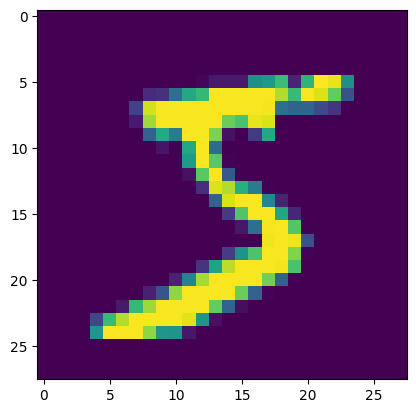

In [6]:
plt.imshow(X_train[0])

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1084 - accuracy: 0.9676 - val_loss: 0.1152 - val_accuracy: 0.9650
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0973 - val_accuracy: 0.9721
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9820 - val_loss: 0.1055 - val_accuracy: 0.9681
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.1256 - val_accuracy: 0.9662
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0886 - val_accuracy: 0.9754
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.1037 - val_accuracy: 0.9732
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0248 - accuracy: 0.9918 - val_loss: 0.1043 - val_accuracy:

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred = np.argmax(y_prob, axis=1)

In [13]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.977

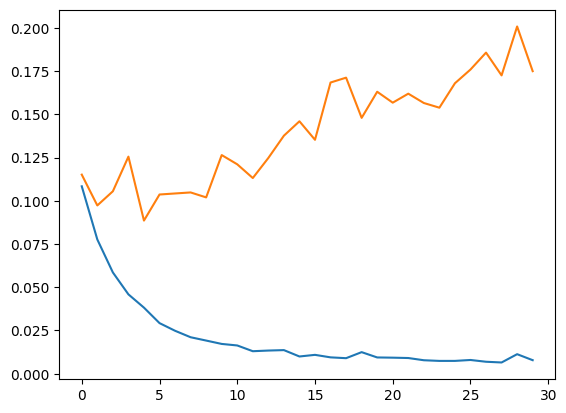

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

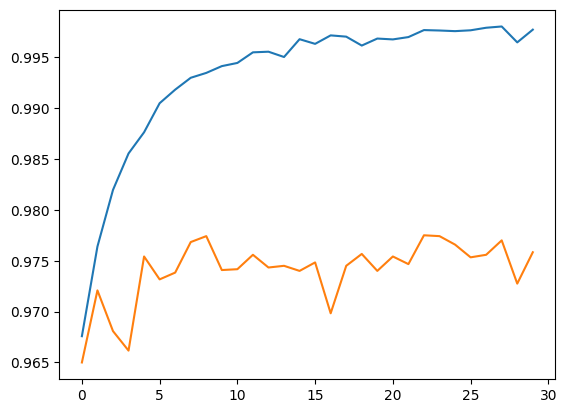

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])